In [1]:
# change to `%matplotlib` for interactive methods
%matplotlib inline

from imgseries import ImgSeries
import matplotlib.pyplot as plt
from pathlib import Path

# Define ImgSeries object

In [2]:
basefolder = Path('data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder)

**NOTE**: see further below for the case where the images are within a TIFF stack

# Access, read and show individual images

In [3]:
images.files[33]

filo.File #33 [img-00643.png in folder 'data/img2']

In [4]:
images.files[33].file

PosixPath('data/img2/img-00643.png')

In [5]:
images.read(33)  # read image num 33 as an array

array([[ 69,  68,  72, ...,  69,  65,  56],
       [ 65,  54,  52, ...,  59,  59,  65],
       [ 65,  59,  59, ...,  61,  66,  63],
       ...,
       [ 81,  90,  77, ...,  92,  90, 103],
       [ 80,  91,  81, ...,  91,  90,  98],
       [ 89,  83,  83, ...,  87,  94, 103]], dtype=uint8)

<AxesSubplot:title={'center':'img-00610.png (#0)'}>

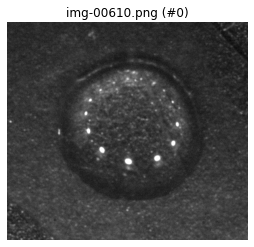

In [6]:
images.show()  # show first image in the series

<AxesSubplot:title={'center':'img-00643.png (#33)'}>

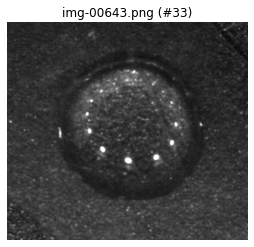

In [7]:
images.show(33)  # show specific image in the series

# Define general rotation and crop on image series

**NOTE**: Matplotlib must be using an interactive backend for most of the commands below to work (e.g. `tk` or `qt5` are ok, but not `inline`).

## Rotation: define

Define rotation angle by drawing a line that is supposed to be horizontal:

In [46]:
images.rotation.define()

Line position recorded. Line deleted.


Same, but using a vertical line (and by using an image different from the first one):

In [84]:
images.rotation.define(vertical=True, num=9)

Line position recorded. Line deleted.


Manual definition of rotation angle (in degrees):

In [8]:
images.rotation.angle = -66.6  # equivalently, images.rotation.data['angle'] = -66.6

## Rotation: show and reset

Get value of rotation angle in degrees (if None, then the angle has not been defined)

In [9]:
images.rotation.angle

-66.6

Show rotated image with the info of the angle value:

<AxesSubplot:title={'center':'Rotation: -66.6° (img #0)'}>

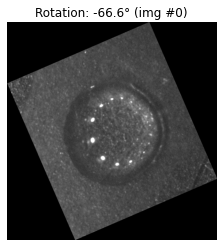

In [10]:
images.rotation.show()

Reset rotation (similar to setting the angle manually to zero, but `rotation.data` also gets empty):

In [11]:
images.rotation.reset()

## Crop: define

Define crop zone by clicking on two corners of a rectangle with cursors:

In [40]:
images.crop.define()

Define crop zone with a draggable rectangle (and on an image different from the first one):

In [83]:
images.crop.define(draggable=True, num=10)

Rectangle position recorded. Rectangle deleted.


Define crop zone by entering values of (X, Y, Width, Height) manually:

In [11]:
images.crop.zone = (186, 193, 391, 500)

## Crop: show and reset

Get information about location of crop (X, Y, Width, Height):

In [12]:
images.crop.zone

(186, 193, 391, 500)

Show where crop zone is on full (rotated if applicable) image:

<AxesSubplot:title={'center':'Crop Zone (img #0)'}>

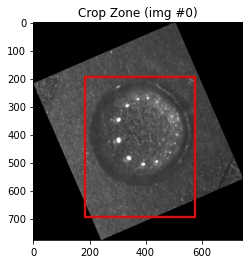

In [13]:
images.crop.show()

Reset crop to full image:

<AxesSubplot:title={'center':'img-00620.png (#10)'}>

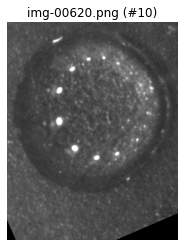

In [14]:
images.show(num=10)

In [18]:
images.crop.reset()

<AxesSubplot:title={'center':'img-00620.png (#10)'}>

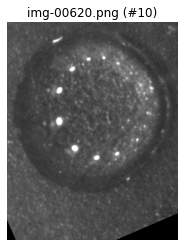

In [15]:
images.show(num=10)

## Save and load transform parameters

In [16]:
images.save_transform()  # there are options to specify a custom filename, see help

In [17]:
images.load_transform()  # custom filename possible here too
images.rotation.angle

-66.6

## Load and see images with rotation and crop

This is done automatically once the crop and/or rotation are defined, e.g.:

<AxesSubplot:title={'center':'img-00621.png (#11)'}>

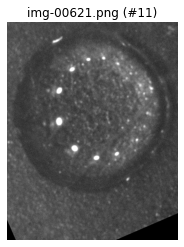

In [18]:
images.show(num=11)

In order to load and/or show the image without crop/rotation:

In [19]:
images.read(num=11, transform=False)

array([[ 67,  65,  75, ...,  72,  70,  61],
       [ 64,  51,  52, ...,  63,  61,  74],
       [ 66,  55,  59, ...,  56,  65,  65],
       ...,
       [ 77,  82,  72, ...,  94,  92, 107],
       [ 77,  90,  81, ...,  96,  95, 102],
       [ 92,  85,  85, ...,  88,  94, 104]], dtype=uint8)

<AxesSubplot:title={'center':'img-00621.png (#11) [RAW]'}>

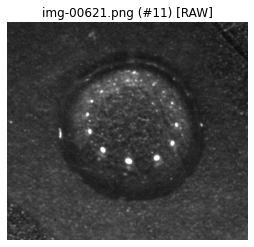

In [20]:
images.show(num=11, transform=False)

# Image timestamps

## Get and save time of images

In [21]:
images.info.head()  # extracted automatically from the file info (modification time)

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1.620833e+09
1,img1,img-00611.png,1.620833e+09
2,img1,img-00612.png,1.620833e+09
3,img1,img-00613.png,1.620833e+09
4,img1,img-00614.png,1.620833e+09


In [22]:
images.save_info()  # save file and timing info from images.info into csv file

## Load time of image from external file

In [23]:
images.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')    # replace all file data
images.load_time('for-tests-do-not-modify/Img_Files_Rounded.tsv')  # update only time data
images.info.head()

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1599832397
1,img1,img-00611.png,1599832399
2,img1,img-00612.png,1599832401
3,img1,img-00613.png,1599832403
4,img1,img-00614.png,1599832405


# Working with tiff stacks

In [24]:
images = ImgSeries(stack='data/stack/ImgStack.tif', savepath='data/stack')

In [25]:
images.stack

array([[[46171, 46683, 47739, ..., 43722, 44538, 43962],
        [46987, 46747, 47963, ..., 43898, 45227, 45387],
        [46187, 45947, 45659, ..., 44666, 45963, 45963],
        ...,
        [46427, 47115, 44266, ..., 45867, 46475, 46907],
        [45034, 44154, 42762, ..., 47483, 46411, 46635],
        [43642, 41818, 40329, ..., 47979, 47995, 49404]],

       [[47787, 47387, 47211, ..., 43562, 44858, 43930],
        [47451, 47387, 47627, ..., 43370, 44570, 44490],
        [47675, 46683, 47979, ..., 44250, 44490, 45147],
        ...,
        [46123, 47435, 47243, ..., 48699, 49884, 50172],
        [46635, 46027, 46315, ..., 49724, 50348, 49756],
        [47323, 46379, 45403, ..., 49276, 49724, 51404]],

       [[47195, 47275, 46731, ..., 43402, 44362, 43434],
        [47339, 47435, 46443, ..., 44298, 44250, 45115],
        [47595, 47099, 47067, ..., 45339, 44394, 45034],
        ...,
        [45851, 45483, 45131, ..., 49099, 50444, 51372],
        [45595, 44890, 44410, ..., 49836, 502

In [26]:
images.read(10)

array([[47371, 46683, 46283, ..., 42458, 44074, 43754],
       [48091, 46379, 46443, ..., 42874, 43162, 45627],
       [47467, 46795, 47147, ..., 42090, 43562, 44394],
       ...,
       [39977, 40233, 39945, ..., 47403, 48091, 48763],
       [38505, 39545, 38729, ..., 47163, 48059, 47915],
       [38761, 38649, 40153, ..., 47147, 47787, 46811]], dtype=uint16)

<AxesSubplot:title={'center':'Image (#10)'}>

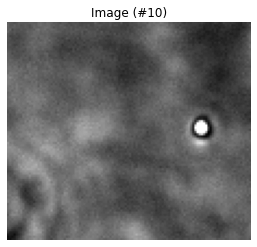

In [27]:
images.show(10)

Note: global rotation, crop, etc. work the same way as for image series from individual files:

<AxesSubplot:title={'center':'Crop Zone (img #19)'}>

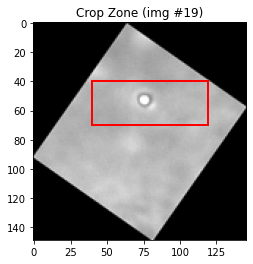

In [28]:
images.rotation.angle = 55
images.crop.zone = (40, 40, 80, 30)
images.crop.show(num=19)